# UnaryLinearRegression

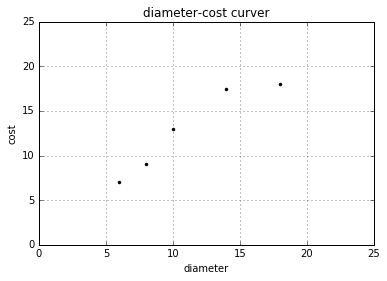

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def runplt():
    plt.figure()
    plt.title(u'diameter-cost curver')
    plt.xlabel(u'diameter')
    plt.ylabel(u'cost')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()

X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

# train model

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X, y)
print('Predict the price ot a 12-inch pizza： $%.2f' % 
      model.predict(np.array([12]).reshape(-1, 1))[0])

Predict the price ot a 12-inch pizza： $13.68


# predict

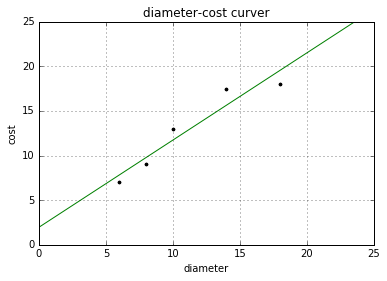

In [4]:
plt = runplt()
plt.plot(X, y, 'k.')

X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

# predict comparison

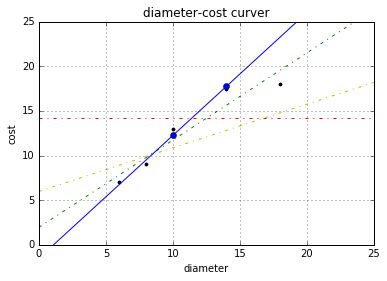

In [8]:
plt = runplt()
plt.plot(X, y, 'k.')

y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()

# cost plot

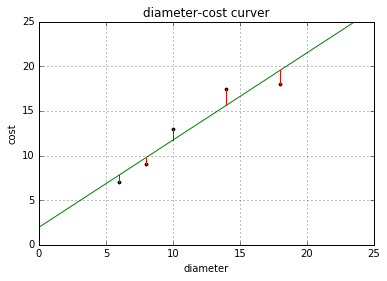

In [11]:
plt = runplt()
plt.plot(X, y, 'k.')

X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

# residuals predict
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

plt.show()

# residual sum of squares

In [12]:
import numpy as np
print('residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

residual sum of squares: 1.75


# variance and covariance

In [14]:
print(np.var([6, 8, 10, 14, 18], ddof=1))

print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

23.2
22.65


# model evaluation

In [15]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
model.score(X_test, y_test)

0.6620052929422553

# Mutiple Regression

In [16]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)

X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)

for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


# Polynomial Regression

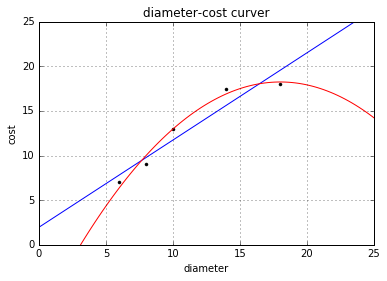

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
('1 r-squared', 0.80972679770766498)
('2 r-squared', 0.86754436563450543)


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()

print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('1 r-squared', regressor.score(X_test, y_test))
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

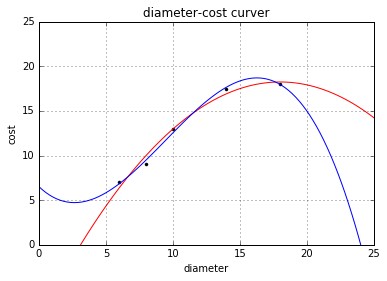

[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03]
 [  1.00000000e+00   1.40000000e+01   1.96000000e+02   2.74400000e+03]
 [  1.00000000e+00   1.80000000e+01   3.24000000e+02   5.83200000e+03]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02]
 [  1.00000000e+00   1.10000000e+01   1.21000000e+02   1.33100000e+03]
 [  1.00000000e+00   1.60000000e+01   2.56000000e+02   4.09600000e+03]]
('2 r-squared', 0.86754436563450543)
('3 r-squared', 0.83569241560371099)


In [18]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)

xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))
plt.show()

print(X_train_cubic)
print(X_test_cubic)
print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('3 r-squared', regressor_cubic.score(X_test_cubic, y_test))

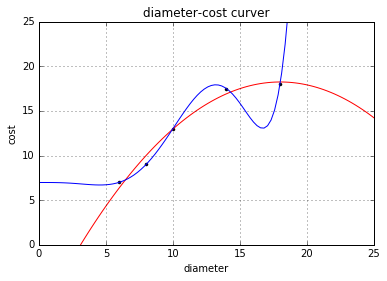

('2 r-squared', 0.86754436563450543)
('7 r-squared', 0.49198460568651992)


In [19]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

seventh_featurizer = PolynomialFeatures(degree=7)
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)

xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()

print('2 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('7 r-squared', regressor_seventh.score(X_test_seventh, y_test))

# lasso regression

In [21]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

regressor = SGDRegressor(loss='squared_loss',penalty="l1")
scores = cross_val_score(regressor, X_train, y_train.reshape(-1, 1), cv=5)
print('cv R', scores)
print('mean of cv R', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('Test set R', regressor.score(X_test, y_test))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('cv R', array([ 0.71281515,  0.77556972,  0.57846526,  0.7235948 ,  0.66048878]))
('mean of cv R', 0.69018674162486193)
('Test set R', 0.70777655226047798)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
